In [3]:
import numpy as np
import matplotlib as plt
import csv
import os
import re
import pandas as pd


In [51]:
#A function to get file name and out put file names and legend labels
def getfilename():
    path = os.getcwd()    
    filewithext = []
    filename = []
    for file in [doc for doc in os.listdir(path) if doc.endswith('.txt')]:  
        filewithext.append(file)
        filename.append(file.replace(".txt",""))
    return(filewithext, filename)
#A function converts scientific notationed numbers to floats
def convert_to_float(s):
    try:
        s[0] = float(s[0])
        s[1] = float(s[1])
        return s
    except:
        return s

#A function return a columns of the result of a truth table
#which x_rag and y_tag column should both be numerical values
def is_numerical(s):
    try:
        result = isinstance(s[x_tag], float) and isinstance(s[y_tag], float)
        return result
    except:
        return False

def add_lsv_plot(lsv):
    lsv.plot(ax=ax, 
          x='ref',
          y=1)

In [52]:
filenameext, filename = getfilename()
filenameext[0]

'PCN222.txt'

In [53]:

df = pd.read_csv(filenameext[0])
df = df['XY'].str.split(r"\t", expand=True)
raw = df.iloc[1:,:]
sample_names = ['PCN222', 'PCN222andC70mixture', 'PCN222C70']

In [54]:
lsv1 = raw.iloc[:,0:2].dropna()
lsv2 = raw.iloc[:,2:4].dropna()
lsv3 = raw.iloc[:,4:6].dropna()
lsv2.rename(columns={2:0,3:1}, inplace = True)
lsv3.rename(columns={4:0,5:1}, inplace = True)
refshift= 0.989
area = 0.196

lsv1[[0, 1]] = lsv1[[0, 1]].apply(convert_to_float, axis= 1)
lsv2[[0, 1]] = lsv2[[0, 1]].apply(convert_to_float, axis= 1)
lsv3[[0, 1]] = lsv3[[0, 1]].apply(convert_to_float, axis= 1)

lsv1[1]=lsv1[1]*1000/area
lsv1['ref']=lsv1[0]+refshift

lsv2[1]=lsv2[1]*1000/area
lsv2['ref']=lsv2[0]+refshift

lsv3[1]=lsv3[1]*1000/area
lsv3['ref']=lsv3[0]+refshift

In [55]:
#If the data is copied in txt or a more organized file

# lsv1 = df.iloc[1:,0:2]
# lsv1.rename(columns = {0:'x',1:'y'}, inplace = True)
# lsv1[[x_tag, y_tag]] = lsv1[[x_tag, y_tag]].apply(convert_to_float, axis= 1)
# lsv1.replace("", np.nan, inplace=True)
# lsv1 = lsv1.dropna()

# lsv2 = df.iloc[1:,2:4]
# lsv2.rename(columns = {2:'x',3:'y'}, inplace = True)
# lsv2[[x_tag, y_tag]] = lsv2[[x_tag, y_tag]].apply(convert_to_float, axis= 1)
# lsv2.replace("", np.nan, inplace=True)
# lsv2 = lsv2.dropna()


# lsv3 = df.iloc[1:,4:6]
# lsv3.rename(columns = {4:'x',5:'y'}, inplace = True)
# lsv3[[x_tag, y_tag]] = lsv3[[x_tag, y_tag]].apply(convert_to_float, axis= 1)
# lsv3.replace("", np.nan, inplace=True)
# lsv3 = lsv3.dropna()

# lsv1['ref']=lsv1['x']+refshift
# lsv2['ref']=lsv2['x']+refshift
# lsv3['ref']=lsv3['x']+refshift
# lsv1['normA']=lsv1['y']*1000/area
# lsv2['normA']=lsv2['y']*1000/area
# lsv3['normA']=lsv3['y']*1000/area




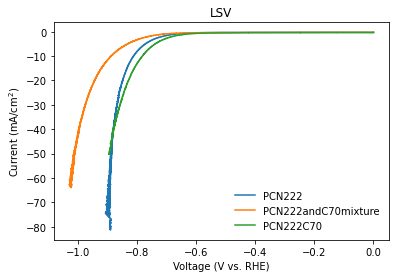

In [57]:
ax = lsv1.plot(x='ref',
          y=1,
          title  = 'LSV',
          #xlim = (-0.3,0.6),
          #ylim = (-0.1, 0)
         )
add_lsv_plot(lsv2)
add_lsv_plot(lsv3)
#add_lsv_plot(lsv4)
ax.set(xlabel='Voltage (V vs. RHE)', ylabel='Current (mA/cm$\mathregular{^{2}}$)')
ax.legend(sample_names,frameon=False)
ax.figure.savefig(filename[0] + 'LSV.png')

In [211]:
# ax = lsv2.plot(x='ref',
#           y='normA',
#           title  = 'LSV',
#           xlim = (-1,0),
#           ylim = (-10, 0)
#          )
# ax.set(xlabel='Voltage (V vs. RHE)', ylabel='Current (mA/cm$\mathregular{^{2}}$)')
# ax.legend([sample])
# # current_handles, current_labels = plt.gca().get_legend_handles_labels()
# # reversed_handles = list(reversed(current_handles))
# # reversed_labels = list(reversed(current_labels))
# #plt.legend(legend_ls, frameon=False, handlelength=0)
# # plt.xlim(1,20)
# # plt.xticks(np.arange(1, 20, 2.0))
# #plt.yticks([])
# # plt.xlabel('Voltage (V vs. RHE)')
# # plt.ylabel('Current (A/cm$\mathregular{^{2}}$)')
# # plt.title('CV')
# # plt.savefig(sample + 'CV.png')
# # plt.show()